In [136]:
# http://www.kdd.org/exploration_files/KDDCUP2005Report_Shen.pdf
# http://research.microsoft.com/pubs/81350/sigir09.pdf
# http://research.microsoft.com/pubs/79487/Query%20Enrichment%20for%20Web-query%20Classification.Shen.HKUST.TOIS.2006.Paper.pdf
%matplotlib inline

import pandas as pd
import numpy as np

import glob
import re

import matplotlib.pyplot as plt

from collections import Counter

So, `data_gatherer.ipynb` hooked up to the databases and extracted tweets reated to the #teaparty. However, there is still some minor cleanup to do before we begin answering these questions.

In [42]:
###########################################
# create a function to combine data files #
###########################################

def frame_masher():
    # find all of the query files
    numbers = [1,4,5,6,7,11,12,15] # combine these datafiles
    query_files = []
    for num in numbers:
        file ='data/tea_party/tea_party{}.csv'.format(num)
        query_files.append(file)
    
    
    # empty list to add data frames to
    frame_list = []
    
    # iterate through the files to create one combined date frame
    for frame in query_files:
        df = pd.read_csv(frame)
        frame_list.append(df)
    joined = pd.concat(frame_list).reset_index()
    final = joined.drop('index',axis = 1)
    return final

In [43]:
# create the combined data frame
df = frame_masher()

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,3,4,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,1,2,3,4,5,6,9,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (3,4,5,6,9,11,12,14) have mixed types. Speci

In [44]:
# little bit of clean up

df = df.loc[df['job_id'] == '2572']

### 1. How many tweets are in the collection?

In [46]:
print("There are {} in this collection of Tea Party tweets".format(len(df)))

There are 2548992 in this collection of Tea Party tweets


### 2. When do they start?
**and**
### 3. When do they end?

In [82]:
# change the `changed_at` column to a datetime type

df['created_at']=pd.to_datetime(df['created_at'],format='%Y-%m-%d %H:%M:%S')

In [48]:
# find the earliest and latest tweets in the set

early = df['created_at'].min()
recent = df['created_at'].max()
print("the earliest tweet of this set is {} and the most recent is {}.".format(early,recent))

the earliest tweet of this set is 2014-08-05 13:30:16 and the most recent is 2016-04-21 21:35:44.


### 4. What is the trend for tweet volume?

In [143]:
# create a function that will output the tweet volume graph
def tweetVolume(frame):
    frame['Month'] = frame['created_at'].dt.month
    frame['Year'] = frame['created_at'].dt.year
    frame['Day'] = frame['created_at'].dt.day
    f = frame.groupby(['Day','Month','Year']).size()
    q = pd.DataFrame(f)
    
    q.reset_index(level=0, inplace=True)
    q.reset_index(level=0, inplace=True)
    q.reset_index(level=0, inplace=True)
    
    sort = q.sort(['Year','Month','Day'], ascending = [True,True,True])
    sort['date']=pd.to_datetime((sort.Year*10000+sort.Month*100+sort.Day).apply(str),format='%Y%m%d')
    
    return plt.plot(sort['date'],sort[0])

looks like there are some spikes in 2015.


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


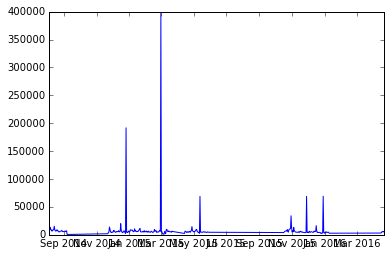

In [145]:
# convert the date column into something matplotlib can read and then plot it. 
df['date_int'] = df.created_at.astype(np.int64)
tweetVolume(df)
print("looks like there are some spikes in 2015.")

### 4. If you look at the most common words over the lifetime of the search, do you notice any particular trends associated with those words?

In [54]:
df['text'] = df['text'].astype(str).str.lower()
Counter(" ".join(df["text"]).split()).most_common(100)

[('tea', 1650654),
 ('party', 1316697),
 ('rt', 1230075),
 ('the', 1055651),
 ('to', 530801),
 ('a', 517169),
 ('#treason', 390857),
 ('@1niceguy1104:', 326794),
 ('of', 303852),
 ('is', 281538),
 ('and', 280882),
 ('in', 271112),
 ('i', 250012),
 ('for', 246492),
 ('-', 204408),
 ('you', 186983),
 ('on', 186641),
 ('meet', 184705),
 ('at', 140050),
 ('with', 133496),
 ('out', 132625),
 ('from', 126189),
 ('wanna', 118724),
 ('madhuri', 115288),
 ('new', 107435),
 ('so', 106707),
 ('boston', 102604),
 ('that', 92574),
 ('&amp;', 92048),
 ('it', 91364),
 ('this', 89627),
 ('are', 89493),
 ('have', 86712),
 ('party.', 85056),
 ('by', 78728),
 ("party's", 76764),
 ('via', 73947),
 ('be', 73300),
 ('candidate', 73130),
 ('news', 72928),
 ('chance', 72598),
 ('favorite', 72216),
 ('taj', 71939),
 ('mahal', 71654),
 ('not', 68850),
 ('my', 67508),
 ('gives', 67495),
 ('story', 67119),
 ('we', 67026),
 ('was', 66464),
 ('#meetmadhuri!', 65707),
 ('thrilled!', 65555),
 ('moon', 64519),
 ('babe

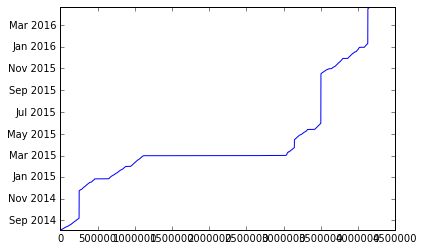

In [141]:
boston = df[df["text"].str.contains("boston")]

